In [ ]:
pip install numpy pandas scikit-learn tensorflow matplotlib ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# URL of the dataset (replace with the correct link)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

# Load the dataset directly from the URL
df = pd.read_csv(url, header=None)

# Display basic information about the dataset to see how many columns it has
print(df.info())

# Based on the inspection, the dataset has 14 columns instead of 9
# Set the appropriate column names based on the dataset's structure
df.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Price',
              'OtherFeature1', 'OtherFeature2', 'OtherFeature3', 'OtherFeature4', 'OtherFeature5']

# Display the first few rows to verify
print(df.head())

# Handle missing values (if any) by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Define features and target
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X = df[features]
y = df['Price']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you can proceed with model training, evaluation, and predictions


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.00632      18.0      2.31          0       0.538     6.575      65.2   
1  0.02731       0.0      7.07          0       0.469     6.421      78.9   
2  0.02729     

Step 3: Build the Neural Network Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()

# Input layer and first hidden layer (64 neurons, ReLU activation)
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer (32 neurons, ReLU activation)
model.add(Dense(32, activation='relu'))

# Output layer (single neuron for price prediction)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

model training

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 148.5575 - mae: 8.8558 - val_loss: 178.1839 - val_mae: 9.6893
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 160.8064 - mae: 9.0209 - val_loss: 162.0712 - val_mae: 8.8727
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 127.3130 - mae: 7.5852 - val_loss: 142.4068 - val_mae: 7.9887
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 101.0013 - mae: 6.3932 - val_loss: 116.6309 - val_mae: 7.0904
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 97.7811 - mae: 6.5465 - val_loss: 86.0884 - val_mae: 6.2693
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 71.0756 - mae: 5.6962 - val_loss: 59.5734 - val_mae: 5.4035
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52.8621 - mae: 5.2118 - val_loss: 44.7775 - val_mae: 4.7510
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 41.8673 - mae: 4.5886 - val_loss: 39.9709 - val_mae: 4.4553
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━

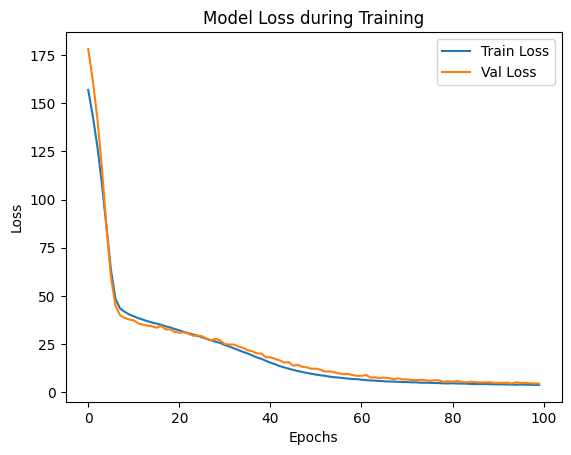

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


evaluation

In [ ]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6576 - mae: 1.3775  
Test Loss: 4.526427745819092
Test MAE: 1.358925461769104


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


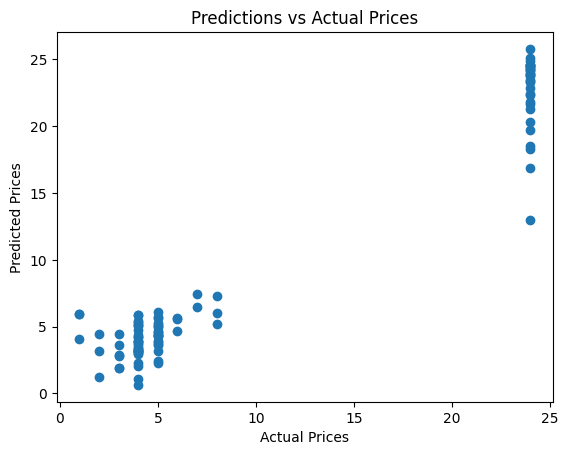

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Plot predictions vs actual prices
plt.scatter(y_test, y_pred)
plt.title('Predictions vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [ ]:

import numpy as np

# Reshape the predictions to 1D if necessary
y_pred = y_pred.reshape(-1)  # Flatten the predictions

# Calculate evaluation metrics
mae = np.mean(np.abs(y_pred - y_test))
mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1.3589254991680968
Mean Squared Error (MSE): 4.526428126400629
Root Mean Squared Error (RMSE): 2.1275403936002317


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

# Function to make predictions based on user input
def make_prediction(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude):
    # Create a new data point with the input values
    new_house = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])
    new_house_scaled = scaler.transform(new_house)  # Standardize the new data point
    predicted_price = model.predict(new_house_scaled)
    print(f"Predicted House Price: ${predicted_price[0][0]:,.2f}")

# Interactive widgets for real-time input
interact(make_prediction,
         MedInc=widgets.FloatSlider(value=3.0, min=0.0, max=15.0, step=0.1, description='MedInc'),
         HouseAge=widgets.FloatSlider(value=20.0, min=1.0, max=100.0, step=1.0, description='HouseAge'),
         AveRooms=widgets.FloatSlider(value=6.0, min=1.0, max=10.0, step=0.1, description='AveRooms'),
         AveBedrms=widgets.FloatSlider(value=3.0, min=1.0, max=6.0, step=0.1, description='AveBedrms'),
         Population=widgets.FloatSlider(value=1000.0, min=500.0, max=5000.0, step=50.0, description='Population'),
         AveOccup=widgets.FloatSlider(value=3.0, min=1.0, max=10.0, step=0.1, description='AveOccup'),
         Latitude=widgets.FloatSlider(value=37.0, min=35.0, max=40.0, step=0.1, description='Latitude'),
         Longitude=widgets.FloatSlider(value=-120.0, min=-125.0, max=-115.0, step=0.1, description='Longitude'))


interactive(children=(FloatSlider(value=3.0, description='MedInc', max=15.0), FloatSlider(value=20.0, descript…

<function __main__.make_prediction(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# URL of the dataset (replace with the correct link)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"

# Load the dataset directly from the URL
df = pd.read_csv(url, header=None)

# Set the appropriate column names
df.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Price',
              'OtherFeature1', 'OtherFeature2', 'OtherFeature3', 'OtherFeature4', 'OtherFeature5']

# Handle missing values (if any) by filling them with the mean of the column
df.fillna(df.mean(), inplace=True)

# Define features and target
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X = df[features]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and compile a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 143.4989   
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134.2961 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120.2633 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.9576
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.5610  
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.3937 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.4517 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.9607 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.2070 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.0375 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.1008 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.4870 
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.1181 
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.6159 
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

# Function to make predictions based on user input
def make_prediction(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude):
    # Create a new data point with the input values
    new_house = np.array([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]])

    # Standardize the new data point using the same scaler
    new_house_scaled = scaler.transform(new_house)

    # Predict the price using the trained model
    predicted_price = model.predict(new_house_scaled)

    # Print the predicted price
    print(f"Predicted House Price: ${predicted_price[0][0]:,.2f}")

# Interactive widgets for real-time input
interact(make_prediction,
         MedInc=widgets.FloatSlider(value=3.0, min=0.0, max=15.0, step=0.1, description='MedInc'),
         HouseAge=widgets.FloatSlider(value=20.0, min=1.0, max=100.0, step=1.0, description='HouseAge'),
         AveRooms=widgets.FloatSlider(value=6.0, min=1.0, max=10.0, step=0.1, description='AveRooms'),
         AveBedrms=widgets.FloatSlider(value=3.0, min=1.0, max=6.0, step=0.1, description='AveBedrms'),
         Population=widgets.FloatSlider(value=1000.0, min=500.0, max=5000.0, step=50.0, description='Population'),
         AveOccup=widgets.FloatSlider(value=3.0, min=1.0, max=10.0, step=0.1, description='AveOccup'),
         Latitude=widgets.FloatSlider(value=37.0, min=35.0, max=40.0, step=0.1, description='Latitude'),
         Longitude=widgets.FloatSlider(value=-120.0, min=-125.0, max=-115.0, step=0.1, description='Longitude'))


interactive(children=(FloatSlider(value=3.0, description='MedInc', max=15.0), FloatSlider(value=20.0, descript…

<function __main__.make_prediction(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)>

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = np.mean(np.abs(y_pred.flatten() - y_test[:len(y_pred)]))  # Flatten y_pred if necessary
mse = np.mean((y_pred.flatten() - y_test[:len(y_pred)]) ** 2)
rmse = np.sqrt(mse)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Absolute Error (MAE): 3.174369387766894
Mean Squared Error (MSE): 21.75367804231423
Root Mean Squared Error (RMSE): 4.664083837401964
